# Predicting Hair Salon No-Shows
### No-shows are a big problem for hair salons. They decrease revenue and increase wait times.

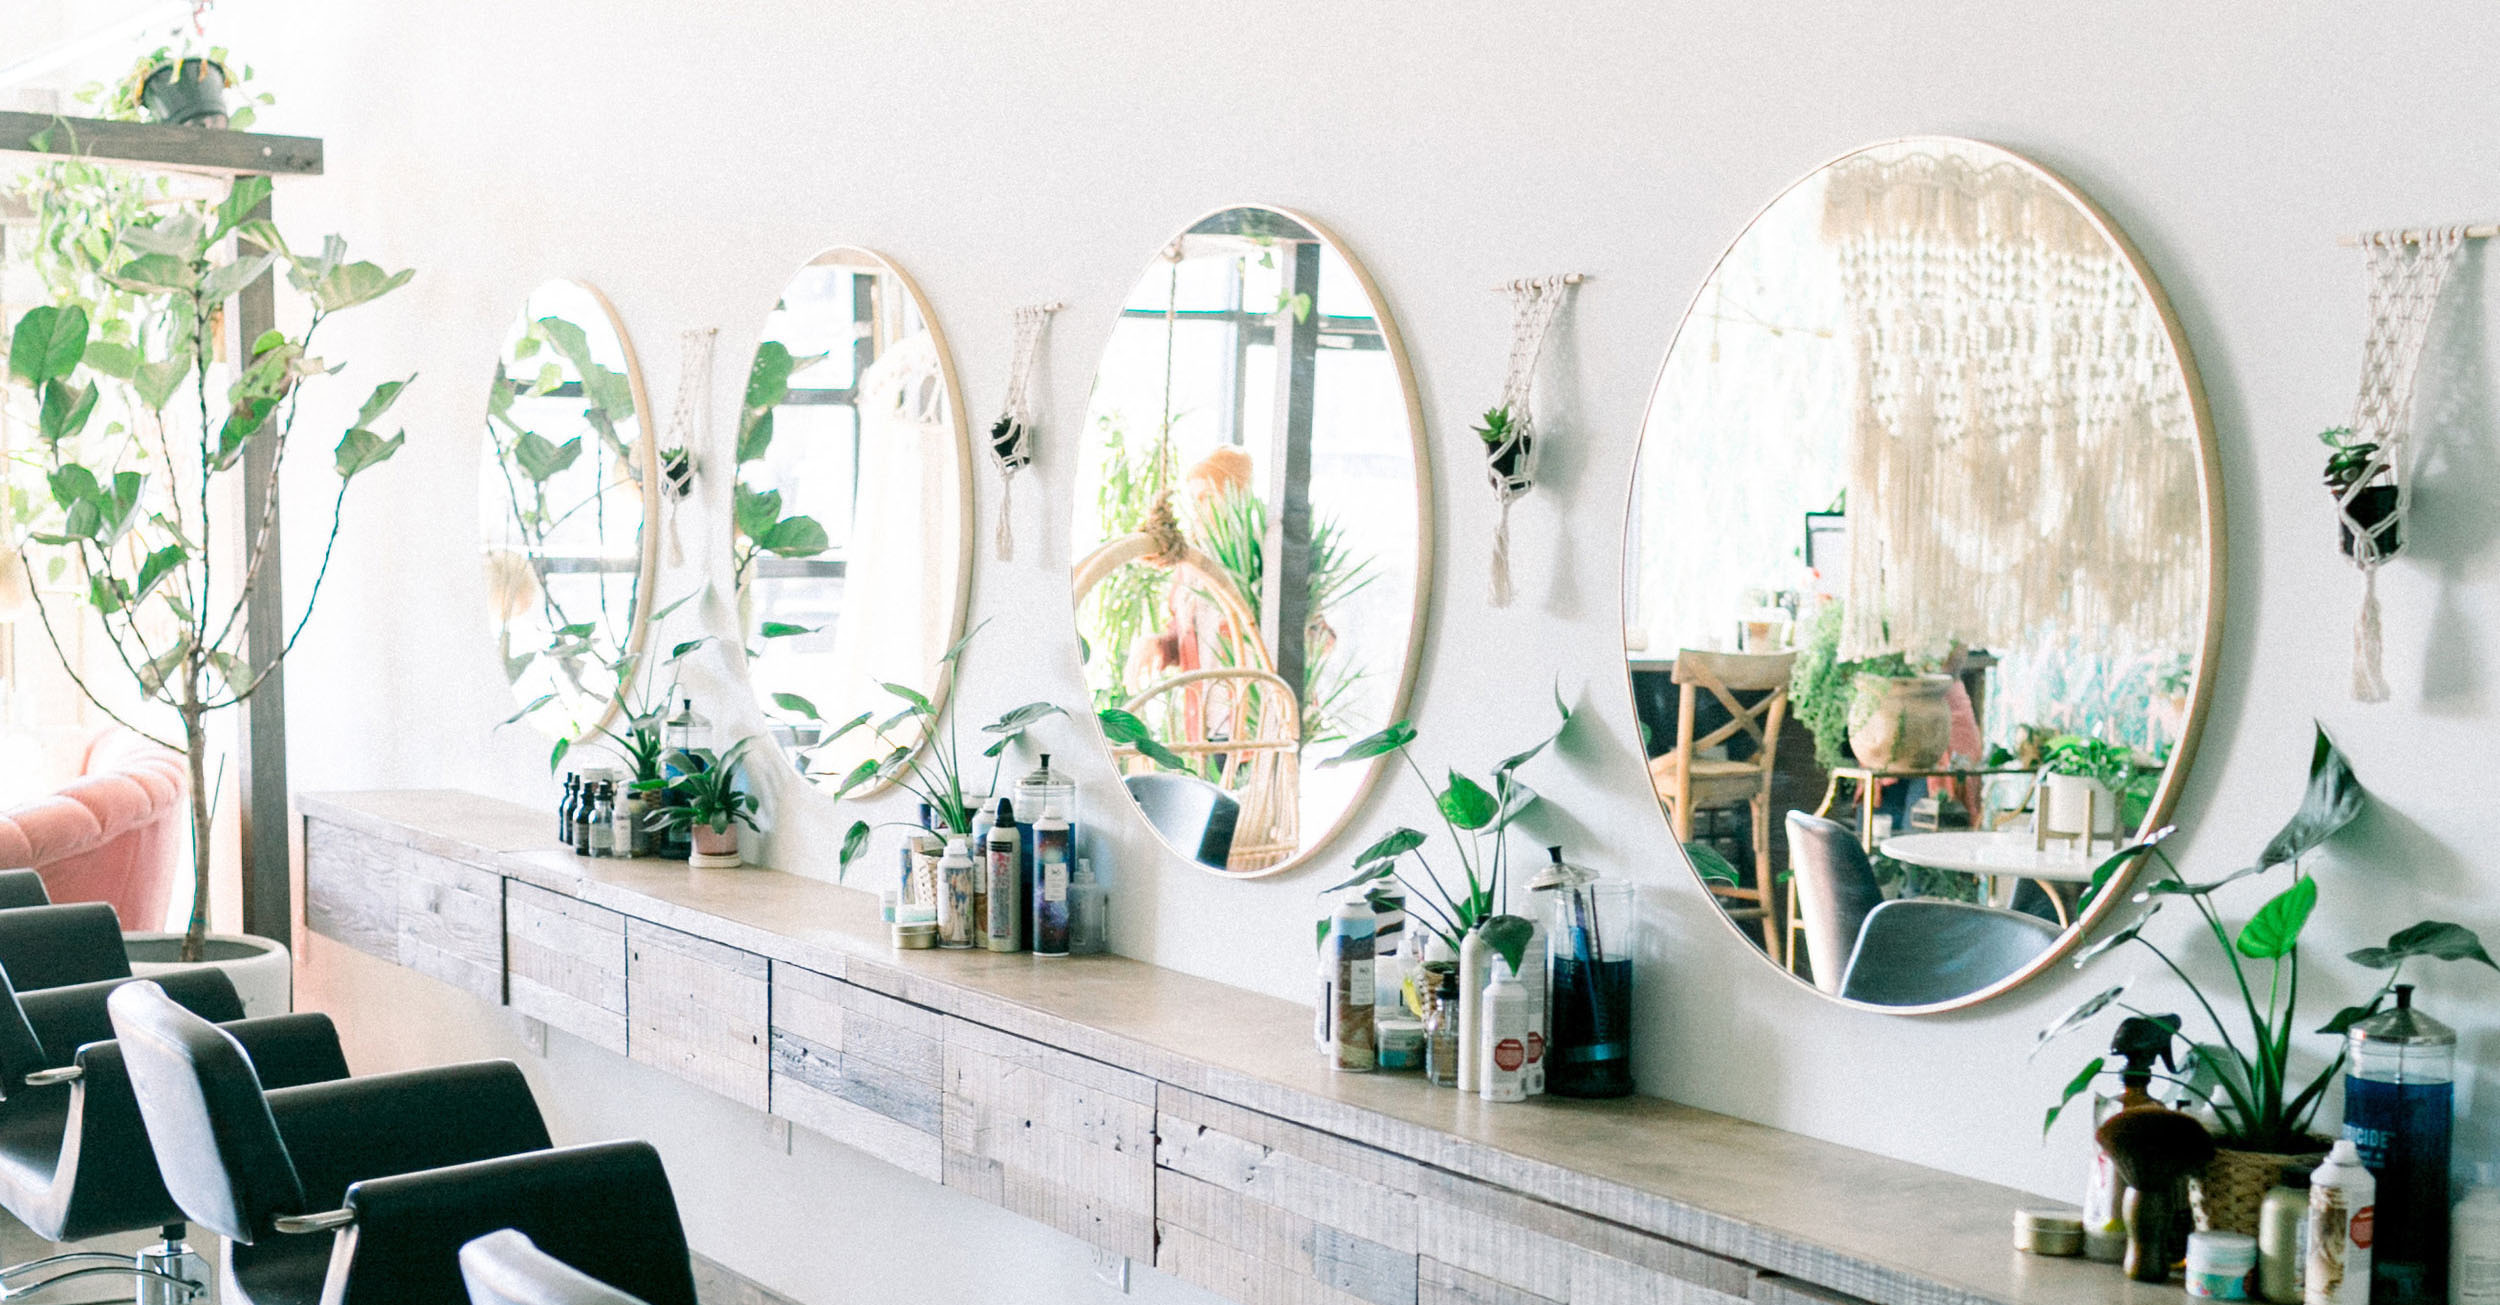

# ML Applied to a Small Business


+ Many of the datasets on Kaggle are collected with the goal of finding a solution using ML techniques
+ Typically rich in relevant features and well-organized


+ Small businesses stand to benefit from ML, but don't always have the foresight to collect meaningful data
+ This was the case with a Toronto hair salon that was getting a lot of no-show customers
+ No-shows are a problem for many different industries


### Can meaningful insights be provided to a small business using just the (rather simple) data they collected?
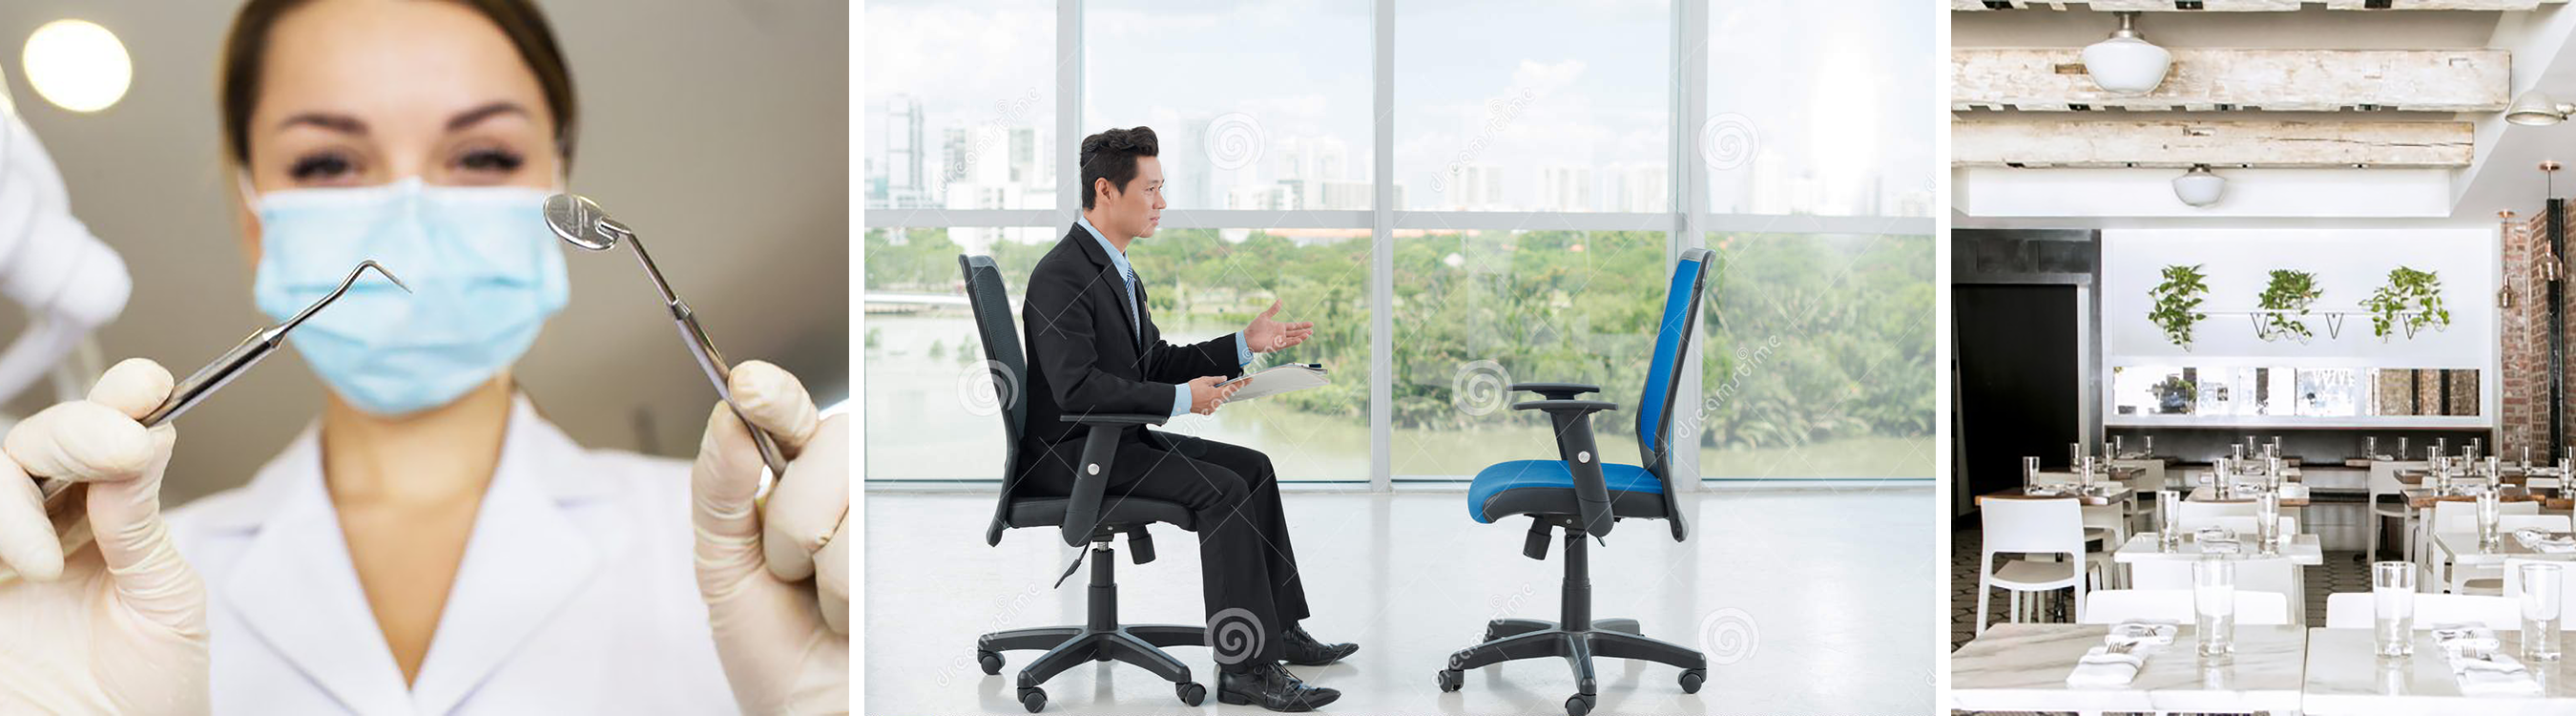

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# If running notebook using Anaconda:
df = pd.read_csv('hair_salon_no_show_wrangled_df.csv')

# If running notebook using Google Collabs
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# !ls "/content/gdrive/My Drive/Brainstation"
# df = pd.read_csv("/content/gdrive/My Drive/Brainstation/hair_salon_no_show_wrangled_df.csv")


df.columns = ['Booking TOD', 'Booking DOW', 'Booking Category', 'Booking Staff', 
              'Last Category', 'Last Staff', 'Number Last Services', 'Last Receipt Total', 'Last DOW', 'Last TOD', 
              'Last Noshow', 'Last Prod Purchase', 'Cumulative Rev', 'Cumulative Bookings', 'Cumulative Style Appt', 
              'Cumulative Color Appt', 'Cumulative Prod Purchase', 'Cumulative Cancellations', 
              'Cumulative Noshow', 'Noshow', 'Days Since Booking']

# No-Shows Cost this Salon > \\$25 k Per Year


+ About 11% of clients are no-shows for appointments
+ A linear regression was fit to the data and shows that the average apointment generates about \\$66
+ On average, 1.5 no-shows happen per day, which translates to a loss of about \\$100 per day, or \\$25,553 per year



         Revenue =  66.47 x - 0.28

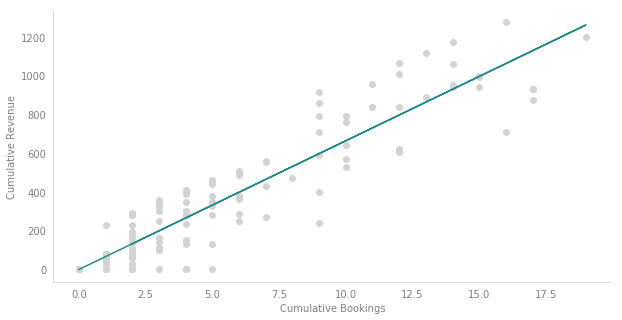

In [2]:
# Pull out the number of shows and no-shows so that % can be calculated
shows = df[df["Noshow"]==0]["Noshow"].shape[0]
noshows = df[df["Noshow"]==1]["Noshow"].shape[0]

# There are many duplicates, probably because many customers have similar profiles
# Let's remove the duplicate values
df_duplicates = df[df.duplicated()] 
df_remdup = df.drop_duplicates(keep='last')

# There is only one appt that was on a Monday
# Should remove because it's probably a special appointment that's not representative of the dataset
df_remdup = df_remdup[df_remdup["Booking DOW"] != "Mon"] 
df_remdup = df_remdup[df_remdup["Last DOW"] != "Mon"]

def get_no_null(frame, column):
    return frame[~frame[column].isnull()]

# Feature Engineering
df_remdup["TOD Change"] = df_remdup["Booking TOD"] == df_remdup["Last TOD"]
df_remdup["DOW Change"] = df_remdup["Booking DOW"] == df_remdup["Last DOW"]
df_remdup["Category Change"] = df_remdup["Booking Category"] == df_remdup["Last Category"]
df_remdup["Staff Change"] = df_remdup["Booking Staff"] == df_remdup["Last Staff"]

# How much does a no-show cost the salon?
df_noshows = df_remdup.loc[df_remdup['Noshow'] == 1]
df_shows = df_remdup.loc[df_remdup['Noshow'] == 0]

x1 = df_noshows["Cumulative Bookings"]
y1 = df_noshows["Cumulative Rev"]

# Plot
fit1 = np.polyfit(x1, y1, 1)
fit1_fn = np.poly1d(fit1) 
print("         Revenue = ", str(fit1_fn).strip(), end="")

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x1, y1, color = "lightgray")
ax.plot(x1, fit1_fn(x1), color = "#238A8D")
ax.set_xlabel("Cumulative Bookings", color = "gray")
ax.set_ylabel("Cumulative Revenue", color = "gray")

ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")

plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

plt.show()

# Data Used for the Project


+ The salon provided 5 months of appointment data (March to July, 2018; source: Kaggle)

For current and past appointments:
+ Appointment day of week and time of day
+ Booking service category (styling or color appointment)
+ Booking staff (Becky, JJ, Joanne, Kelly, Sinead, Tanya)
+ No-show status
+ If they bought hair products at their last visit

Historical data:
+ Cumulative revenue
+ Cumulative appointments
+ Cumulative no-shows

* additional data available, but not used in project

# Booking Day, Staff, and Service May Be Important


+ Sunday was the least popular day for bookings, but if a client booked on a Sunday, there is a high chance they will cancel
+ Joanne was least likely to have a cancelled appointment
+ Clients are less likely to cancel if they have booked a coloring compared to a styling appointment


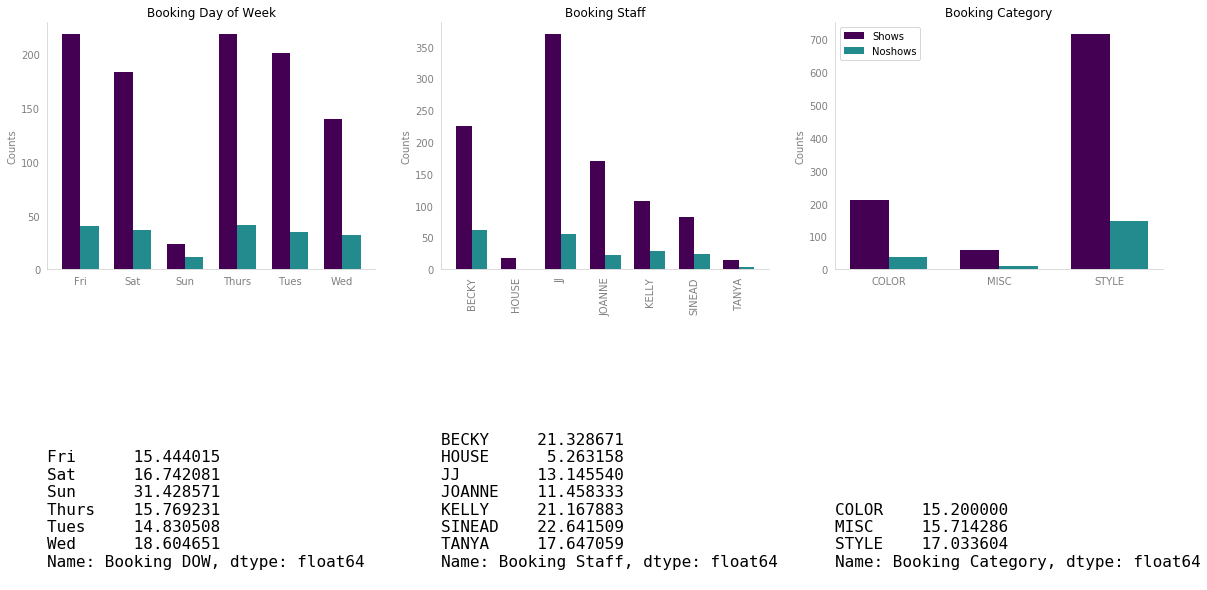

In [3]:
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(2, 3, 1)
noshows_valuecounts = df_noshows["Booking DOW"].value_counts().sort_index()
shows_valuecounts = df_shows["Booking DOW"].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Booking Day of Week")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

ax = plt.subplot(2, 3, 4)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax = plt.subplot(2, 3, 2)
noshows_valuecounts = df_noshows["Booking Staff"].value_counts().sort_index()
shows_valuecounts = df_shows["Booking Staff"].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Booking Staff")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
plt.xticks(rotation = "vertical")

ax = plt.subplot(2, 3, 5)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax = plt.subplot(2, 3, 3)
noshows_valuecounts = df_noshows["Booking Category"].value_counts().sort_index()
shows_valuecounts = df_shows["Booking Category"].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Booking Category")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.legend()

ax = plt.subplot(2, 3, 6)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# Customer Loyalty and Visit Frequency Likely Strong Indicators

+ Longer-term customers were less likely to be a no-show than short-term customers
+ Customers who booked another appointment within a week of their previous appointment were more likely to be no-shows
+ Surprising, cumulative no shows does not look like a strong indicator

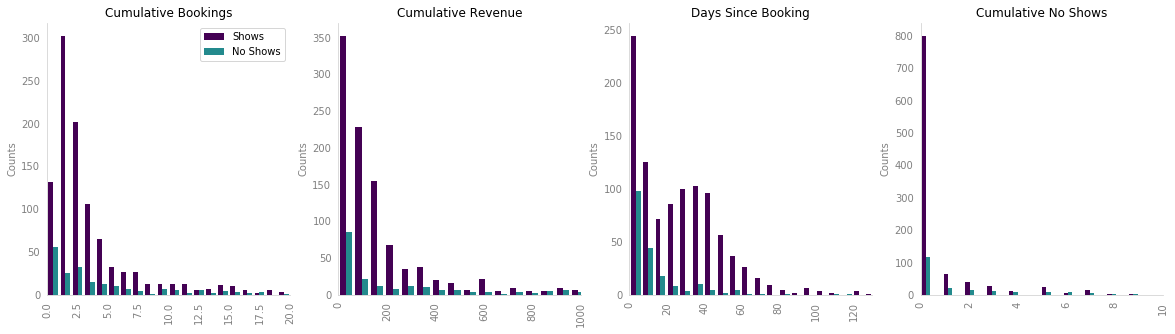

In [4]:
fig = plt.figure(figsize=(20, 5))

ax = plt.subplot(1, 4, 1)
feature = "Cumulative Bookings"
ax.hist([get_no_null(df_shows, feature)[feature], 
        get_no_null(df_noshows, feature)[feature]], 
        color = ["#440154","#238A8D"], label = ["Shows", "No Shows"], bins = 20)
ax.set_xlim(0, 20)
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Cumulative Bookings")
plt.xticks(rotation = "vertical")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
ax.legend()

ax = plt.subplot(1, 4, 2)
feature = "Cumulative Rev"
ax.hist([get_no_null(df_shows, feature)[feature], 
        get_no_null(df_noshows, feature)[feature]], 
        color = ["#440154","#238A8D"], label = ["Shows", "No Shows"], bins = 20)
ax.set_xlim(0, 1000)
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Cumulative Revenue")
plt.xticks(rotation = "vertical")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")

ax = plt.subplot(1, 4, 3)
feature = "Days Since Booking"
ax.hist([get_no_null(df_shows, feature)[feature], 
        get_no_null(df_noshows, feature)[feature]], 
        color = ["#440154","#238A8D"], label = ["Shows", "No Shows"], bins = 20)
ax.set_xlim(0, 130)
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Days Since Booking")
plt.xticks(rotation = "vertical")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")

ax = plt.subplot(1, 4, 4)
feature = "Cumulative Noshow"
ax.hist([get_no_null(df_shows, feature)[feature], 
        get_no_null(df_noshows, feature)[feature]], 
        color = ["#440154","#238A8D"], label = ["Shows", "No Shows"], bins = 20)
ax.set_xlim(0, 10)
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Cumulative No Shows")
plt.xticks(rotation = "vertical")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")

plt.show()

# Changing Hairdresser, Appt Day, or Service Does Not Cause Noshows


+ Created some features to compare the customer's choice from last appointment vs the more recent appointment
+ If the customer swiched their hairdresser, service, or booking day, it could signify that they were unhappy with their last appointment and wanted a change
+ Graphs shows that these changes don't contribute to a customer's likelihood of beign a no show

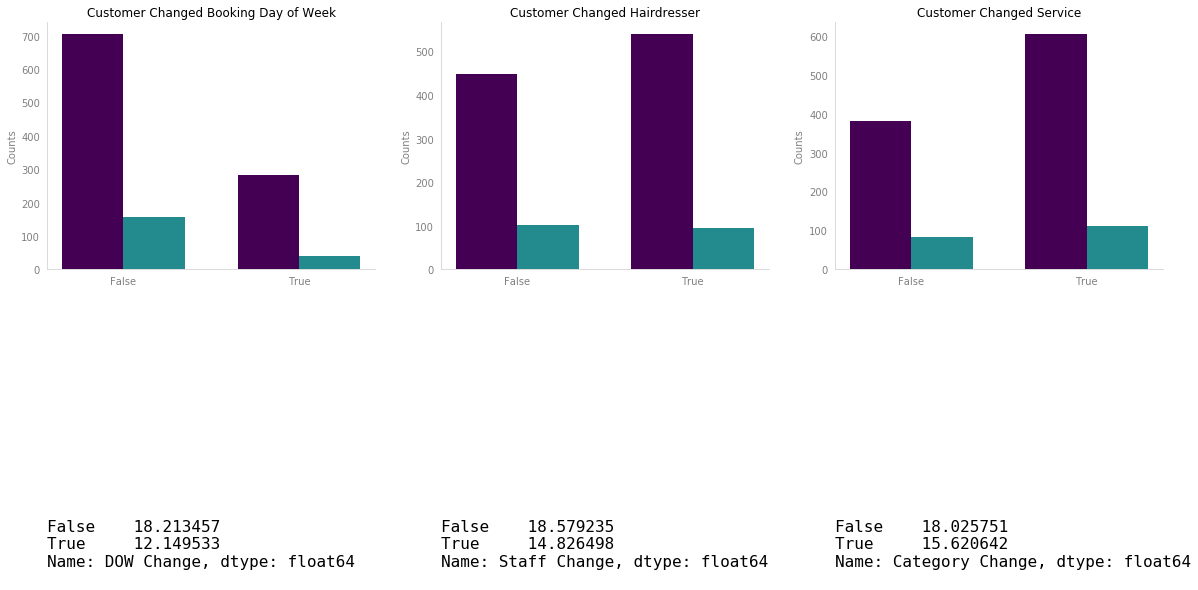

In [5]:
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(2, 3, 1)
feature = "DOW Change"
noshows_valuecounts = df_noshows[feature].value_counts().sort_index()
shows_valuecounts = df_shows[feature].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Customer Changed Booking Day of Week")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

ax = plt.subplot(2, 3, 4)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax = plt.subplot(2, 3, 2)
feature = "Staff Change"
noshows_valuecounts = df_noshows[feature].value_counts().sort_index()
shows_valuecounts = df_shows[feature].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Customer Changed Hairdresser")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

ax = plt.subplot(2, 3, 5)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax = plt.subplot(2, 3, 3)
feature = "Category Change"
noshows_valuecounts = df_noshows[feature].value_counts().sort_index()
shows_valuecounts = df_shows[feature].value_counts().sort_index()
ind = np.arange(len(shows_valuecounts))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/2, shows_valuecounts, width, label='Shows', color = "#440154")
rects2 = ax.bar(ind + width/2, noshows_valuecounts, width, label='Noshows', color = "#238A8D")
ax.set_ylabel("Counts", color = "gray")
ax.set_title("Customer Changed Service")
ax.set_xticks(ind)
ax.set_xticklabels(noshows_valuecounts.index)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

ax = plt.subplot(2, 3, 6)
ax.text(0, 0, str(noshows_valuecounts/(shows_valuecounts + noshows_valuecounts)*100), 
        fontsize = 16, fontfamily = 'monospace')
ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# plt.show()

# Dealing With Unbalanced Classes & One-Hot Encode


+ Because there were much fewer "No Shows" compared to "Shows" customers, I balanced the two classes
+ The categorical variables, like "day of week" and "staff" also need to be one-hot encoded

In [6]:
import sklearn as sk
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, preprocessing

df_remdup_onehot = pd.get_dummies(df_remdup) # one-hot encode the categorical values

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_remdup_onehot[df_remdup_onehot.Noshow == 0]
df_minority = df_remdup_onehot[df_remdup_onehot.Noshow == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=987,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


# Display old class counts
print("Shows Before:\n", df_remdup.Noshow.value_counts().values[0])
print("No-Shows Before:\n", df_remdup.Noshow.value_counts().values[1], "\n\n")

# Display new class counts
print("Shows After:\n", df_upsampled.Noshow.value_counts().values[0])
print("No-Shows After:\n", df_upsampled.Noshow.value_counts().values[1])

Shows Before:
 987
No-Shows Before:
 196 


Shows After:
 987
No-Shows After:
 987


# Choosing Features for ML

+ Before feature selection, a correlation plot was produced to get a general overview of relationships
+ Five features were selected to move forward with ML

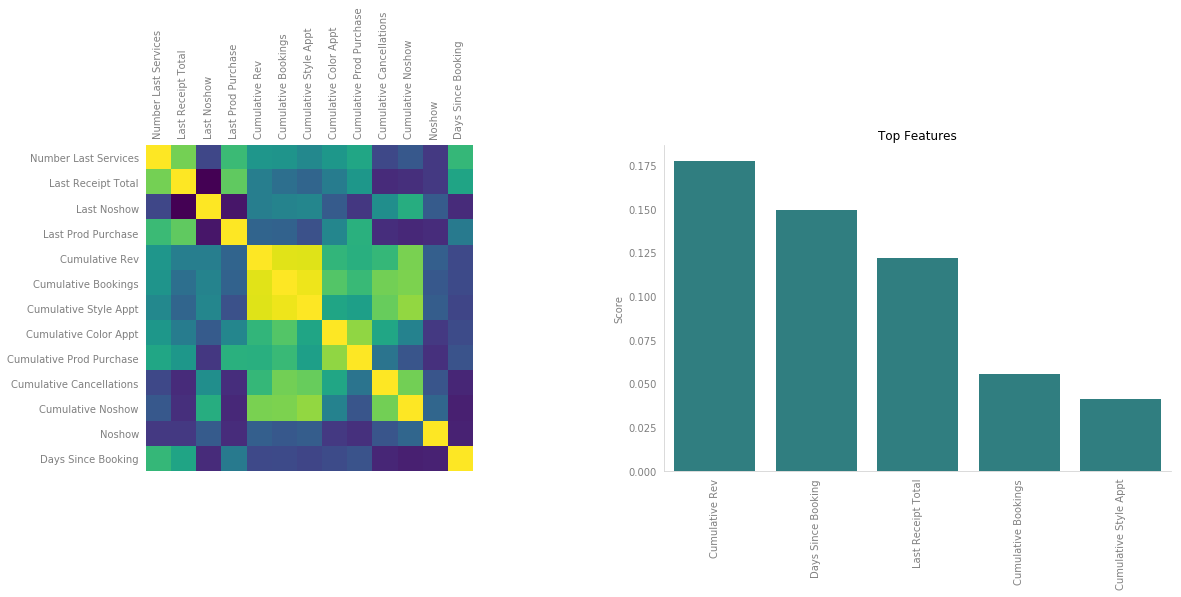

In [7]:
# function for correlation plots
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(corr)
    plt.tick_params(axis='x', which='both', bottom=False, top = False);
    plt.tick_params(axis='y', which='both', left=False);
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical");
    plt.yticks(range(len(corr.columns)), corr.columns);

# Correlation plot
fig = plt.figure(figsize=(20, 6))

ax = plt.subplot(1, 2, 1)
corr = df.corr()
ax.matshow(corr)
plt.tick_params(axis='x', which='both', bottom=False, top = False)
plt.tick_params(axis='y', which='both', left=False)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
plt.yticks(range(len(corr.columns)), corr.columns)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Feature plot
features_to_include = list(df_upsampled.columns.values)
features_to_include.remove("Noshow")
features_to_include

feature_rank = feature_selection.mutual_info_classif(df_upsampled[features_to_include], df_upsampled["Noshow"])
feature_rank_df = pd.DataFrame({'Feature': features_to_include, 'Score': feature_rank})
feature_rank_df = feature_rank_df.sort_values(by = 'Score', ascending = False)

ax = plt.subplot(1, 2, 2)
sns.barplot(feature_rank_df["Feature"][:5], feature_rank_df["Score"][:5], color = "#238A8D")
ax.set_ylabel("Score", color = "gray")
ax.set_xlabel("")
plt.xticks(rotation = "vertical")
ax.set_title("Top Features")
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

plt.show()

In [0]:
# Chosen model features
model_features = ["Days Since Booking", "Cumulative Rev", "Last Receipt Total", 
                  "Cumulative Bookings", "Cumulative Noshow"]

# Make a Train/Test Split
from sklearn.model_selection import train_test_split

#Split the data so the train set contains 60% of the points. Ignore random_state.
X_trn, X_tst, Y_trn, Y_tst = train_test_split(df_upsampled[model_features], 
                                              df_upsampled["Noshow"], test_size=0.4)

# Results of Logistic Regression and Decision Tree


#### Logistic Regression

In [0]:
logreg = sk.linear_model.LogisticRegression()
logreg.fit(X_trn[model_features], Y_trn)

print('Accuracy on training data:',round(logreg.score(X_trn[model_features], Y_trn), 2)*100, "%")
print('Accuracy on test data:',round(logreg.score(X_tst[model_features], Y_tst), 2)*100, "%")
log_reg_acc = round(logreg.score(X_tst[model_features], Y_tst), 2)*100

Accuracy on training data: 72.0 %
Accuracy on test data: 69.0 %


#### Decision Tree

In [0]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
DT_model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=50)
DT_model.fit(X_trn[model_features], Y_trn)

print('Accuracy on training data:',round(DT_model.score(X_trn[model_features], Y_trn), 2)*100, "%")
print('Accuracy on test data:',round(DT_model.score(X_tst[model_features], Y_tst), 2)*100, "%")
dec_tree_acc = round(DT_model.score(X_tst[model_features], Y_tst), 2)*100

Accuracy on training data: 72.0 %
Accuracy on test data: 67.0 %


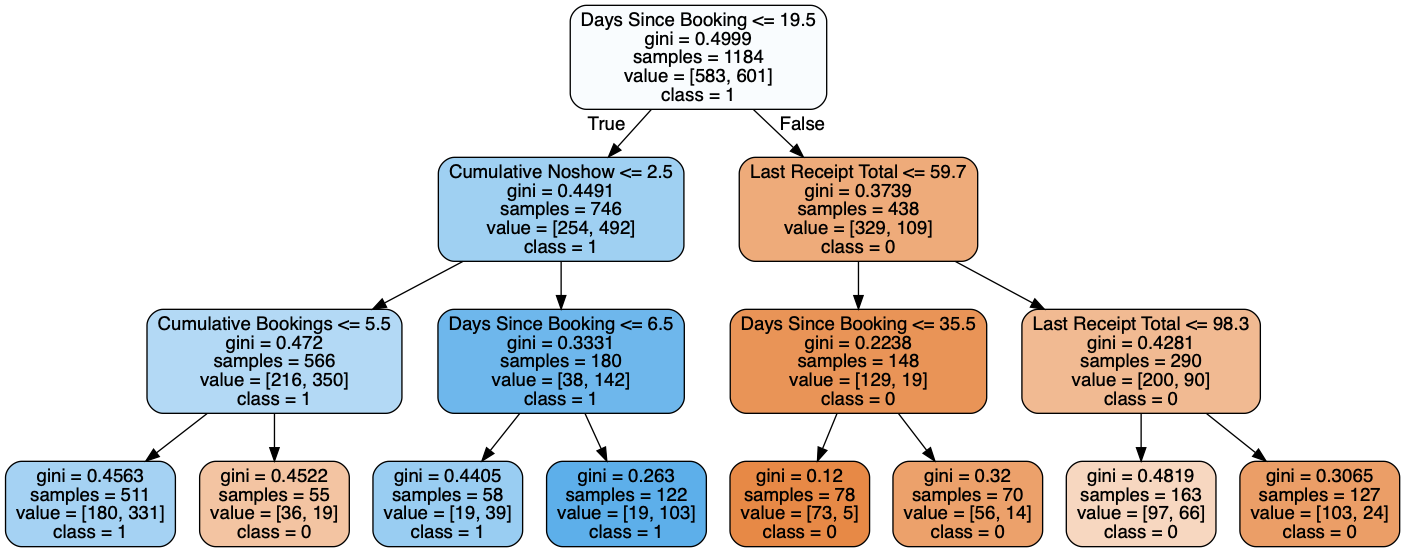

In [0]:
dot_data = StringIO()
export_graphviz(DT_model, out_file=dot_data, feature_names=model_features, class_names=['0','1'],
               rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Results of Random Forests and Gradient Boosted Trees

#### Random Forests

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=4)
random_forest_model.fit(X_trn[model_features], Y_trn)

print('Accuracy on training data:',round(random_forest_model.score(X_trn[model_features], Y_trn), 2)*100, "%")
print('Accuracy on test data:',round(random_forest_model.score(X_tst[model_features], Y_tst), 2)*100, "%")
rand_for_acc = round(random_forest_model.score(X_tst[model_features], Y_tst), 2)*100

Accuracy on training data: 75.0 %
Accuracy on test data: 72.0 %


#### Gradient Boosted Trees

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=50, max_depth=4, min_samples_leaf=100)
gbm_model.fit(X_trn[model_features], Y_trn)

print('Accuracy on training data:',round(gbm_model.score(X_trn[model_features], Y_trn), 2)*100, "%")
print('Accuracy on test data:',round(gbm_model.score(X_tst[model_features], Y_tst), 2)*100, "%")
grad_boost_acc = round(gbm_model.score(X_tst[model_features], Y_tst), 2)*100

Accuracy on training data: 76.0 %
Accuracy on test data: 71.0 %


# Neural Networks

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.metrics import accuracy_score
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.cluster import KMeans

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


#### Simple Neural Net

In [11]:
import warnings
warnings.filterwarnings('ignore')

model = Sequential()
model.add(Dense(1, input_shape=(5,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_trn, Y_trn, epochs=100, verbose=0)

y_train_pred = model.predict_classes(X_trn)
y_test_pred = model.predict_classes(X_tst)

print("Accuracy on training data:", round(accuracy_score(Y_trn, y_train_pred),2)*100, "%")
print("Accuracy on test data:", round(accuracy_score(Y_tst, y_test_pred),2)*100, "%")
simp_nn_acc = round(accuracy_score(Y_tst, y_test_pred),2)*100

Accuracy on training data: 69.0 %
Accuracy on test data: 69.0 %


#### Advanced Neural Net

In [12]:
model = Sequential()
model.add(Dense(4, input_shape=(5,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='exponential'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_trn, Y_trn, epochs=100, verbose=0)

y_train_pred = model.predict_classes(X_trn)
y_test_pred = model.predict_classes(X_tst)

print("Accuracy on training data:", round(accuracy_score(Y_trn, y_train_pred),2)*100, "%")
print("Accuracy on test data:", round(accuracy_score(Y_tst, y_test_pred),2)*100, "%")
adv_nn_acc = round(accuracy_score(Y_tst, y_test_pred),2)*100

Accuracy on training data: 51.0 %
Accuracy on test data: 49.0 %


# Tried and Failed at KMeans Clustering


+ thought it could be useful to cluster the customers into groups
+ could make it easier to identify "no show" customers

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.metrics import accuracy_score
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.cluster import KMeans

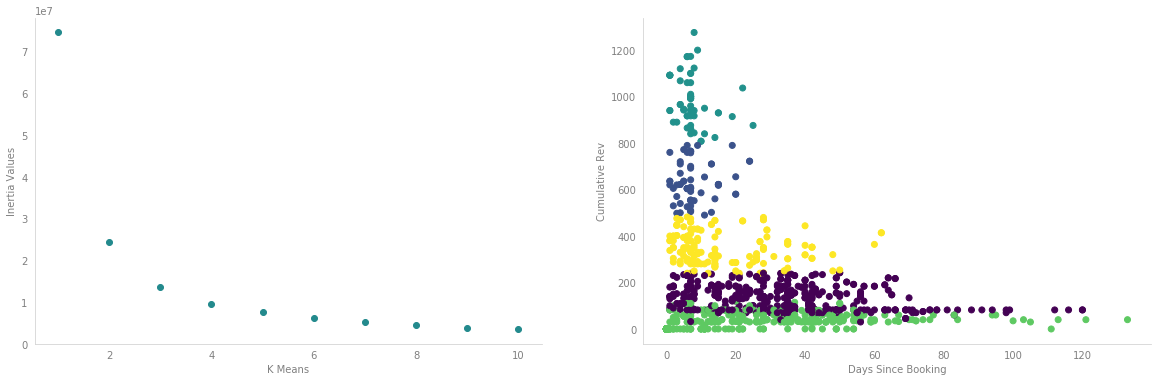

In [0]:
k_range = np.arange(1,10+1)

inertia_list = []

for k in k_range :
    
    #Specify the model
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit(df_remdup_onehot[features_to_include])
    
    inertia_list.append(k_means_model.inertia_)

# Choosing K Plot
fig = plt.figure(figsize=(20, 6))

ax = plt.subplot(1, 2, 1)
ax.scatter(k_range, inertia_list, color = "#238A8D")
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.set_ylabel("Inertia Values", color = "gray")
ax.set_xlabel("K Means", color = "gray")

# Grouping Plot
two_means_model = KMeans(n_clusters = 5)
two_means_model.fit(df_remdup_onehot[features_to_include]);

y_predict = two_means_model.predict(df_remdup_onehot[features_to_include])

ax = plt.subplot(1, 2, 2)
ax.scatter(df_remdup_onehot["Days Since Booking"], 
            df_remdup_onehot["Cumulative Rev"], 
            c = y_predict)
ax.tick_params(axis = 'x', colors = "gray")
ax.tick_params(axis = 'y', colors = "gray")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("lightgray")
ax.spines['left'].set_color("lightgray")
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)
ax.set_ylabel("Cumulative Rev", color = "gray")
ax.set_xlabel("Days Since Booking", color = "gray")

plt.show()

# Conclusions


+ Random forest and gradient boosted trees provided the best results
+ The highest accuracy that was achieved was 72%

In [0]:
simp_nn_acc = 64.0
adv_nn_acc = 51

d = {"ML Method": 
     ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosted Tree", 
      "Simple NN", "Advanced NN"], 
     "Accuracy on Test Data (%)": 
     [log_reg_acc, dec_tree_acc, rand_for_acc, grad_boost_acc, simp_nn_acc, adv_nn_acc]}
df = pd.DataFrame(data=d)
df

,ML Method,Accuracy on Test Data (%)
0,Linear Regression,69.0
1,Decision Tree,67.0
2,Random Forest,72.0
3,Gradient Boosted Tree,71.0
4,Simple NN,64.0
5,Advanced NN,51.0


# Recommendations 

According to the random forest algorithm, the following criteria can be used to predict if a customer will be a no-show:

+ Their cumulative bookings is <5.5 and of those bookings, they have been no-show for <2.5 --> NO SHOW
+ It's been <6.5 days since their last booking, and their cumulative no-shows is <2.5 -------> NO SHOW

Customers who meet this criteria are likely to be no-show (72 % accuracy) so the following preventative actions could be taken:
+ call, email, or text reminders
+ ask likely no-show customers to confirm appointment over the phone
+ restrict likely no-show customers to walk-in appointments only
+ double-book the time slot for customers who are likely to no-show
